StatementMeta(, c4c1d6c1-b142-439e-bb82-9dd87dd071e7, 3, Finished, Available, Finished)

MOBILITY DASHBOARD - NYC TAXI ANALYSIS (2019-2024)

Analyzing Daily Trip Trends...
Loaded 2,192 days of data


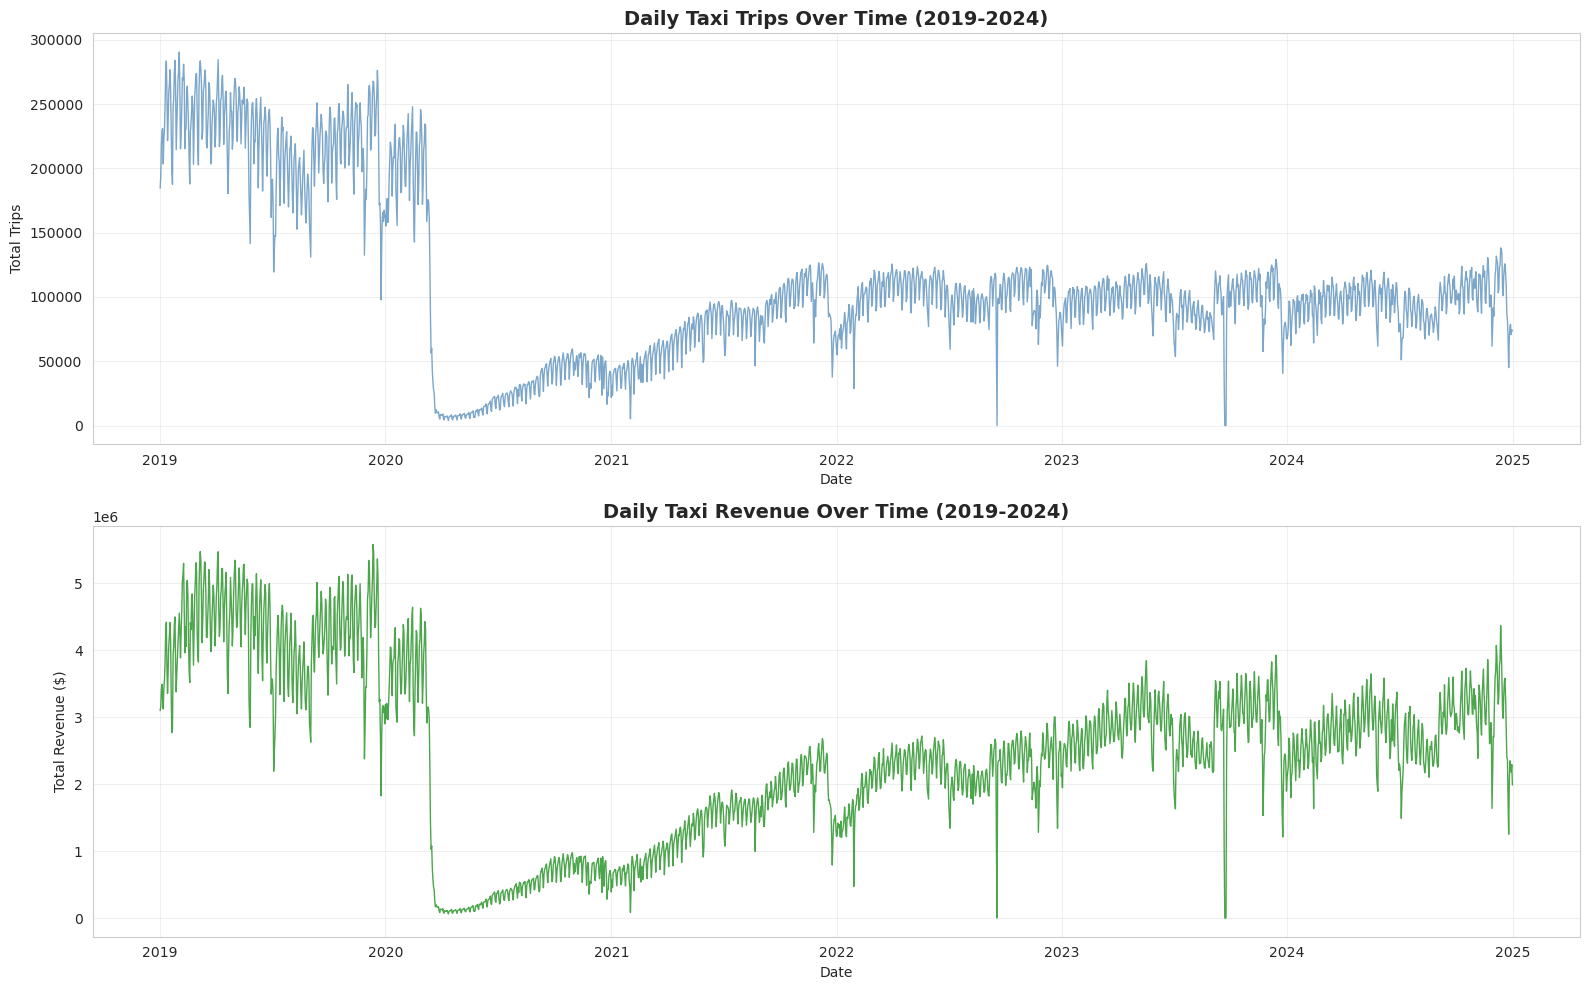


Total Days: 2,192
Total Trips: 240,890,050
Total Revenue: $5,345,771,992.26

Yearly Performance Comparison...


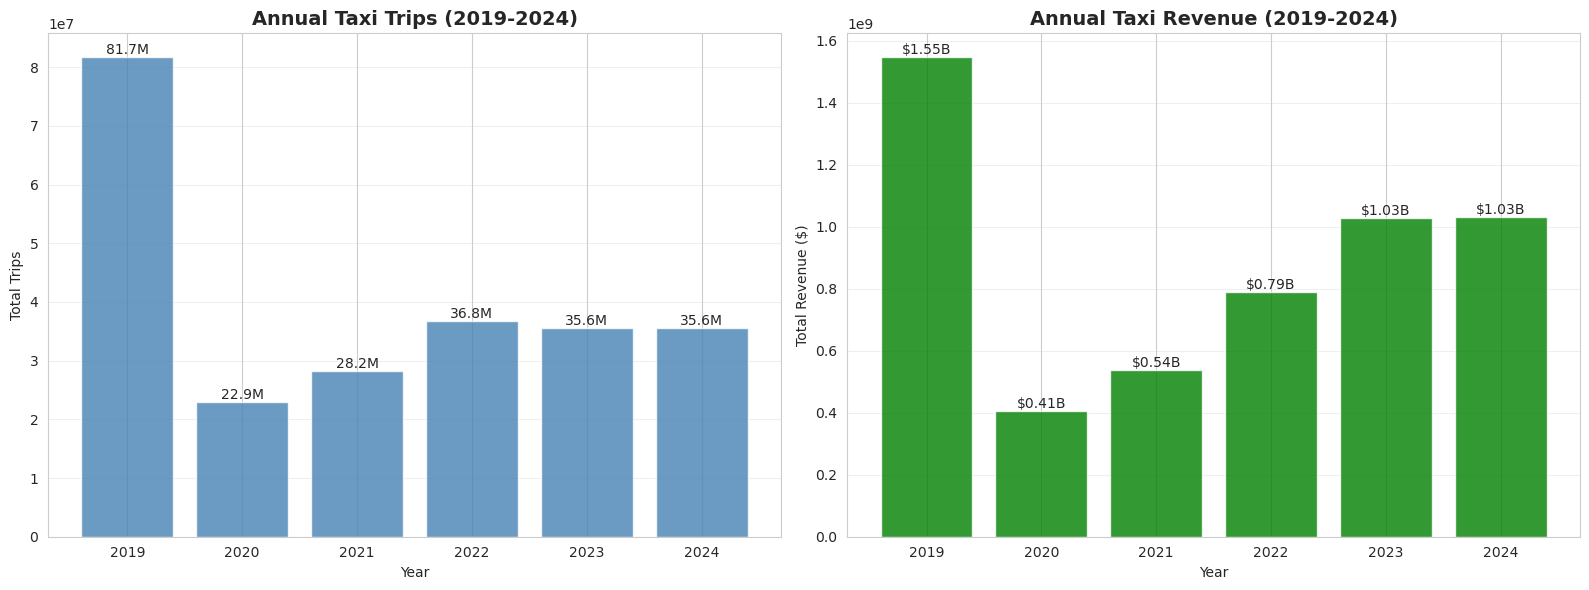


Yearly Summary:
 Year  TotalTrips  TotalRevenue   AvgFare  TotalDistance
 2019  81699116.0  1.547280e+09 24.509545   246172299.64
 2020  22942488.0  4.069928e+08 20.597816    63525350.07
 2021  28233349.0  5.394747e+08 21.812071    87246244.72
 2022  36790115.0  7.902252e+08 23.333384   129786234.65
 2023  35600827.0  1.028707e+09 30.650541   124908728.65
 2024  35624155.0  1.033092e+09 31.222189   122394109.31

Weekday vs Weekend Patterns...


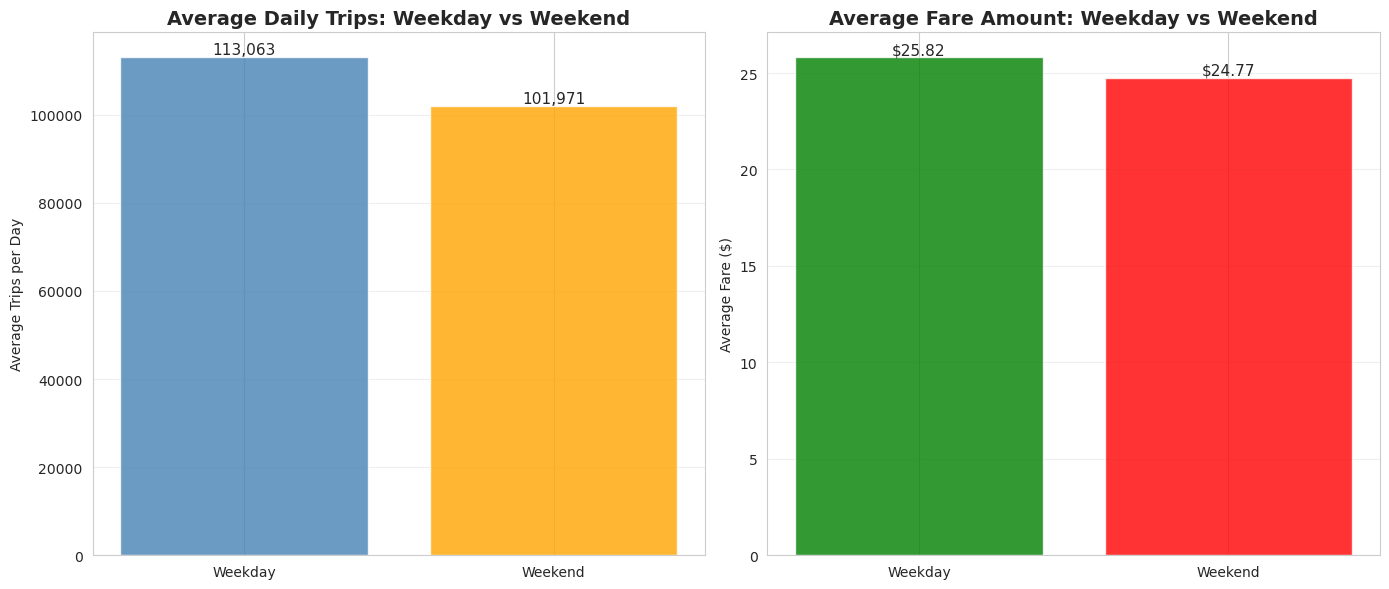


Weekday vs Weekend Summary:
DayType  Days  TotalTrips  AvgTripsPerDay   AvgFare
Weekday  1566   177056106    113062.64751 25.817577
Weekend   626    63833944    101971.15655 24.766942

Top 10 Busiest Pickup Zones...


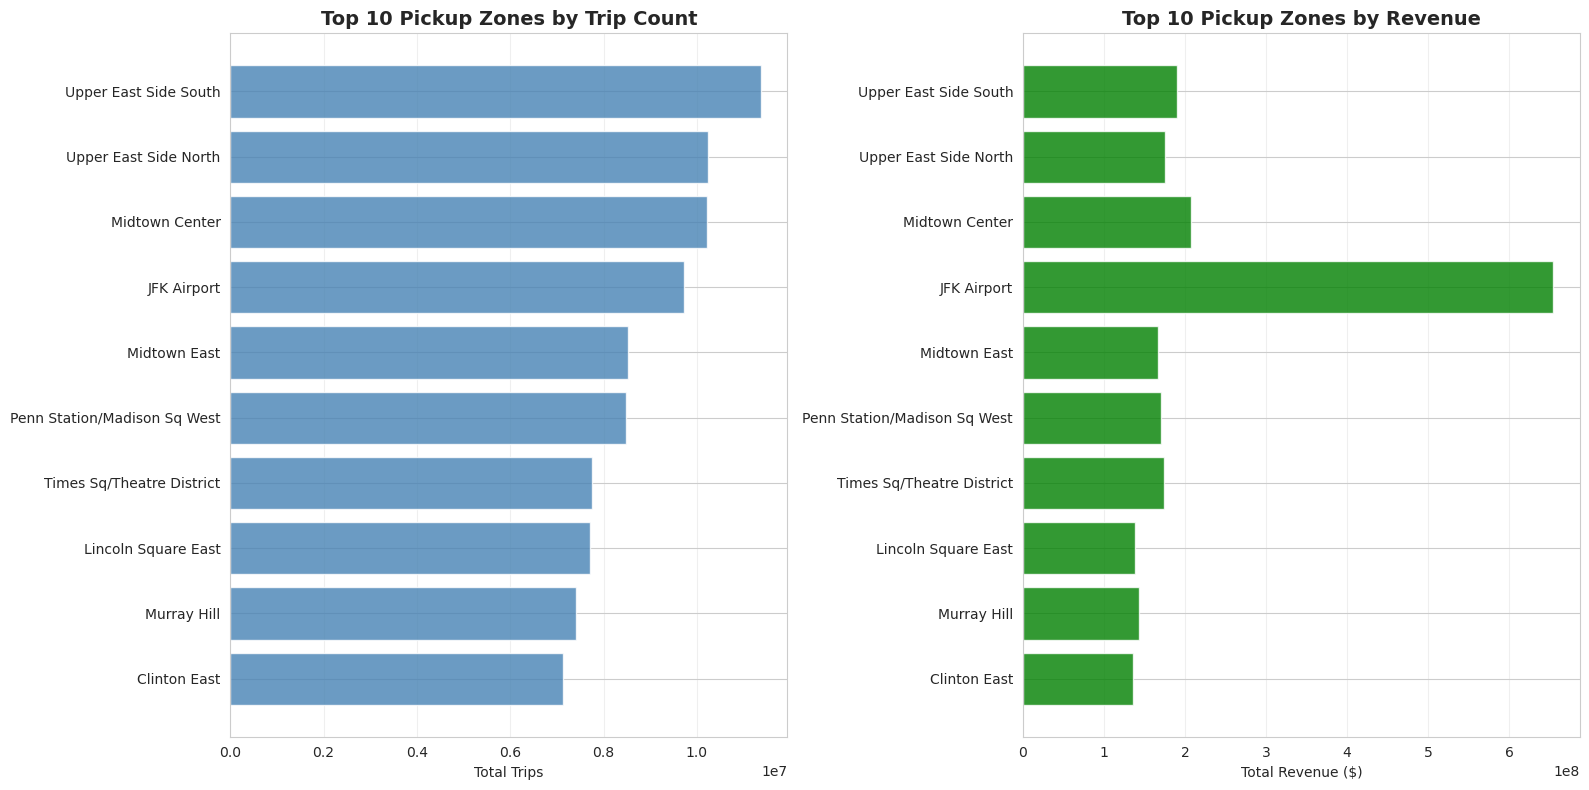


Top 10 Busiest Pickup Zones:
                    ZoneName   Borough  TotalTrips  TotalRevenue   AvgFare
       Upper East Side South Manhattan  11373407.0  189530269.69 24.171530
       Upper East Side North Manhattan  10231873.0  174739211.65 24.732445
              Midtown Center Manhattan  10223072.0  207212517.91 25.774424
                 JFK Airport    Queens   9731156.0  654514301.07 52.580054
                Midtown East Manhattan   8513913.0  166522669.39 24.464890
Penn Station/Madison Sq West Manhattan   8484617.0  170594056.19 27.566875
   Times Sq/Theatre District Manhattan   7760548.0  173663251.24 26.787646
         Lincoln Square East Manhattan   7709360.0  138936567.81 24.856127
                 Murray Hill Manhattan   7414206.0  142657542.79 24.444871
                Clinton East Manhattan   7120463.0  135694143.74 25.930972

Monthly Seasonality Analysis...


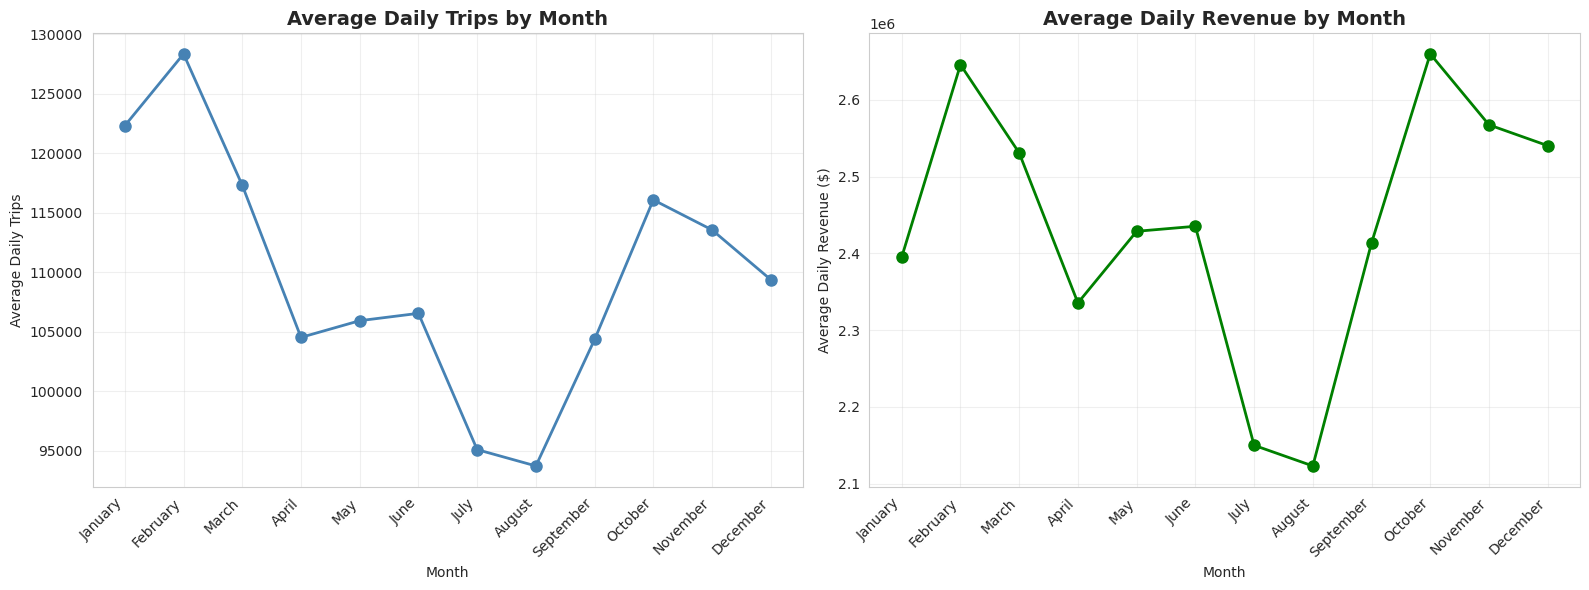


Monthly Patterns:
 Month MonthName  AvgDailyTrips  AvgDailyRevenue
     1   January  122318.440860     2.395379e+06
     2  February  128346.879310     2.645764e+06
     3     March  117312.075269     2.530850e+06
     4     April  104532.816667     2.335499e+06
     5       May  105936.483871     2.428785e+06
     6      June  106553.166667     2.435314e+06
     7      July   95104.897849     2.150010e+06
     8    August   93732.295699     2.123103e+06
     9 September  104357.611111     2.413648e+06
    10   October  116086.607527     2.659828e+06
    11  November  113563.583333     2.567462e+06
    12  December  109382.322581     2.540340e+06
KEY METRICS SUMMARY (2019-2024)

Total Days with Data: 2,192
Total Trips: 240,890,050
Total Revenue: $5,345,771,992.26
Average Fare: $25.52
Total Distance: 774,032,967 miles
Average Trip Duration: 26.86 minutes
MOBILITY DASHBOARD COMPLETE


In [1]:
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

WAREHOUSE = "MobilityWarehouse"

print("MOBILITY DASHBOARD - NYC TAXI ANALYSIS (2019-2024)")

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("\nAnalyzing Daily Trip Trends...")

df_daily_trends = spark.sql(f"""
    SELECT 
        d.Date,
        d.Year,
        d.Month,
        d.MonthName,
        d.IsWeekend,
        SUM(f.TripCount) as TotalTrips,
        SUM(f.TotalAmount) as TotalRevenue,
        AVG(f.AvgFareAmount) as AvgFare
    FROM `{WAREHOUSE}`.dbo.FactTaxiDaily f
    JOIN `{WAREHOUSE}`.dbo.DimDate d ON f.DateKey = d.DateKey
    GROUP BY d.Date, d.Year, d.Month, d.MonthName, d.IsWeekend
    ORDER BY d.Date
""")

pdf_trends = df_daily_trends.toPandas()
pdf_trends['Date'] = pd.to_datetime(pdf_trends['Date'])

print(f"Loaded {len(pdf_trends):,} days of data")

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

axes[0].plot(pdf_trends['Date'], pdf_trends['TotalTrips'], linewidth=1, alpha=0.7, color='steelblue')
axes[0].set_title('Daily Taxi Trips Over Time (2019-2024)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Trips')
axes[0].grid(True, alpha=0.3)

axes[1].plot(pdf_trends['Date'], pdf_trends['TotalRevenue'], linewidth=1, alpha=0.7, color='green')
axes[1].set_title('Daily Taxi Revenue Over Time (2019-2024)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Revenue ($)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTotal Days: {pdf_trends.shape[0]:,}")
print(f"Total Trips: {pdf_trends['TotalTrips'].sum():,.0f}")
print(f"Total Revenue: ${pdf_trends['TotalRevenue'].sum():,.2f}")

print("\nYearly Performance Comparison...")

df_yearly = spark.sql(f"""
    SELECT 
        d.Year,
        SUM(f.TripCount) as TotalTrips,
        SUM(f.TotalAmount) as TotalRevenue,
        AVG(f.AvgFareAmount) as AvgFare,
        SUM(f.TotalDistance) as TotalDistance
    FROM `{WAREHOUSE}`.dbo.FactTaxiDaily f
    JOIN `{WAREHOUSE}`.dbo.DimDate d ON f.DateKey = d.DateKey
    GROUP BY d.Year
    ORDER BY d.Year
""")

pdf_yearly = df_yearly.toPandas()

pdf_yearly['TotalRevenue'] = pdf_yearly['TotalRevenue'].astype(float)
pdf_yearly['TotalTrips'] = pdf_yearly['TotalTrips'].astype(float)
pdf_yearly['AvgFare'] = pdf_yearly['AvgFare'].astype(float)
pdf_yearly['TotalDistance'] = pdf_yearly['TotalDistance'].astype(float)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(pdf_yearly['Year'], pdf_yearly['TotalTrips'], color='steelblue', alpha=0.8)
axes[0].set_title('Annual Taxi Trips (2019-2024)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Trips')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(pdf_yearly['TotalTrips']):
    axes[0].text(pdf_yearly['Year'].iloc[i], v, f'{v/1e6:.1f}M', 
                ha='center', va='bottom', fontsize=10)

axes[1].bar(pdf_yearly['Year'], pdf_yearly['TotalRevenue'], color='green', alpha=0.8)
axes[1].set_title('Annual Taxi Revenue (2019-2024)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Revenue ($)')
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(pdf_yearly['TotalRevenue']):
    axes[1].text(pdf_yearly['Year'].iloc[i], v, f'${v/1e9:.2f}B', 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\nYearly Summary:")
print(pdf_yearly.to_string(index=False))

print("\nWeekday vs Weekend Patterns...")

df_weekend = spark.sql(f"""
    SELECT 
        CASE WHEN d.IsWeekend = 1 THEN 'Weekend' ELSE 'Weekday' END as DayType,
        COUNT(DISTINCT f.DateKey) as Days,
        SUM(f.TripCount) as TotalTrips,
        SUM(f.TripCount) * 1.0 / COUNT(DISTINCT f.DateKey) as AvgTripsPerDay,
        AVG(f.AvgFareAmount) as AvgFare
    FROM `{WAREHOUSE}`.dbo.FactTaxiDaily f
    JOIN `{WAREHOUSE}`.dbo.DimDate d ON f.DateKey = d.DateKey
    GROUP BY CASE WHEN d.IsWeekend = 1 THEN 'Weekend' ELSE 'Weekday' END
""")

pdf_weekend = df_weekend.toPandas()

pdf_weekend['AvgTripsPerDay'] = pdf_weekend['AvgTripsPerDay'].astype(float)
pdf_weekend['AvgFare'] = pdf_weekend['AvgFare'].astype(float)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(pdf_weekend['DayType'], pdf_weekend['AvgTripsPerDay'], 
            color=['steelblue', 'orange'], alpha=0.8)
axes[0].set_title('Average Daily Trips: Weekday vs Weekend', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Average Trips per Day')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(pdf_weekend['AvgTripsPerDay']):
    axes[0].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=11)

axes[1].bar(pdf_weekend['DayType'], pdf_weekend['AvgFare'], 
            color=['green', 'red'], alpha=0.8)
axes[1].set_title('Average Fare Amount: Weekday vs Weekend', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Average Fare ($)')
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(pdf_weekend['AvgFare']):
    axes[1].text(i, v, f'${v:.2f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

print("\nWeekday vs Weekend Summary:")
print(pdf_weekend.to_string(index=False))

print("\nTop 10 Busiest Pickup Zones...")

df_top_zones = spark.sql(f"""
    SELECT 
        z.ZoneName,
        z.Borough,
        SUM(f.TripCount) as TotalTrips,
        SUM(f.TotalAmount) as TotalRevenue,
        AVG(f.AvgFareAmount) as AvgFare
    FROM `{WAREHOUSE}`.dbo.FactTaxiDaily f
    JOIN `{WAREHOUSE}`.dbo.DimZone z ON f.PickupZoneKey = z.ZoneKey
    WHERE z.Borough NOT IN ('Unknown', 'EWR')
    GROUP BY z.ZoneName, z.Borough
    ORDER BY TotalTrips DESC
    LIMIT 10
""")

pdf_zones = df_top_zones.toPandas()

pdf_zones['TotalTrips'] = pdf_zones['TotalTrips'].astype(float)
pdf_zones['TotalRevenue'] = pdf_zones['TotalRevenue'].astype(float)
pdf_zones['AvgFare'] = pdf_zones['AvgFare'].astype(float)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].barh(range(len(pdf_zones)), pdf_zones['TotalTrips'], color='steelblue', alpha=0.8)
axes[0].set_yticks(range(len(pdf_zones)))
axes[0].set_yticklabels(pdf_zones['ZoneName'])
axes[0].set_title('Top 10 Pickup Zones by Trip Count', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Trips')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

axes[1].barh(range(len(pdf_zones)), pdf_zones['TotalRevenue'], color='green', alpha=0.8)
axes[1].set_yticks(range(len(pdf_zones)))
axes[1].set_yticklabels(pdf_zones['ZoneName'])
axes[1].set_title('Top 10 Pickup Zones by Revenue', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Total Revenue ($)')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\nTop 10 Busiest Pickup Zones:")
print(pdf_zones.to_string(index=False))

print("\nMonthly Seasonality Analysis...")

df_monthly = spark.sql(f"""
    SELECT 
        d.Month,
        d.MonthName,
        SUM(f.TripCount) * 1.0 / COUNT(DISTINCT d.Year) / COUNT(DISTINCT d.Day) as AvgDailyTrips,
        SUM(f.TotalAmount) * 1.0 / COUNT(DISTINCT d.Year) / COUNT(DISTINCT d.Day) as AvgDailyRevenue
    FROM `{WAREHOUSE}`.dbo.FactTaxiDaily f
    JOIN `{WAREHOUSE}`.dbo.DimDate d ON f.DateKey = d.DateKey
    GROUP BY d.Month, d.MonthName
    ORDER BY d.Month
""")

pdf_monthly = df_monthly.toPandas()

pdf_monthly['AvgDailyTrips'] = pdf_monthly['AvgDailyTrips'].astype(float)
pdf_monthly['AvgDailyRevenue'] = pdf_monthly['AvgDailyRevenue'].astype(float)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(pdf_monthly['Month'], pdf_monthly['AvgDailyTrips'], 
             marker='o', linewidth=2, markersize=8, color='steelblue')
axes[0].set_title('Average Daily Trips by Month', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Daily Trips')
axes[0].set_xticks(pdf_monthly['Month'])
axes[0].set_xticklabels(pdf_monthly['MonthName'], rotation=45, ha='right')
axes[0].grid(True, alpha=0.3)

axes[1].plot(pdf_monthly['Month'], pdf_monthly['AvgDailyRevenue'], 
             marker='o', linewidth=2, markersize=8, color='green')
axes[1].set_title('Average Daily Revenue by Month', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Daily Revenue ($)')
axes[1].set_xticks(pdf_monthly['Month'])
axes[1].set_xticklabels(pdf_monthly['MonthName'], rotation=45, ha='right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nMonthly Patterns:")
print(pdf_monthly.to_string(index=False))

print("KEY METRICS SUMMARY (2019-2024)")

summary = spark.sql(f"""
    SELECT 
        COUNT(DISTINCT f.DateKey) as TotalDays,
        SUM(f.TripCount) as TotalTrips,
        SUM(f.TotalAmount) as TotalRevenue,
        AVG(f.AvgFareAmount) as OverallAvgFare,
        SUM(f.TotalDistance) as TotalDistance,
        AVG(f.AvgTripDuration) as AvgTripDuration
    FROM `{WAREHOUSE}`.dbo.FactTaxiDaily f
""").toPandas()

for col in summary.columns:
    if col != 'TotalDays':
        summary[col] = summary[col].astype(float)

print(f"\nTotal Days with Data: {summary['TotalDays'].iloc[0]:,}")
print(f"Total Trips: {summary['TotalTrips'].iloc[0]:,.0f}")
print(f"Total Revenue: ${summary['TotalRevenue'].iloc[0]:,.2f}")
print(f"Average Fare: ${summary['OverallAvgFare'].iloc[0]:.2f}")
print(f"Total Distance: {summary['TotalDistance'].iloc[0]:,.0f} miles")
print(f"Average Trip Duration: {summary['AvgTripDuration'].iloc[0]:.2f} minutes")

print("MOBILITY DASHBOARD COMPLETE")